In [55]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from pprint import pprint

In [56]:
df = pd.read_csv('../Resources/cleaned_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Diagnosis,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [57]:
#get number count for each sleep disorder diagnosis

sleep_disorder_roundup=df["Sleep Disorder"].value_counts()
sleep_disorder_roundup

Sleep Disorder
No Diagnosis    219
Sleep Apnea      78
Insomnia         77
Name: count, dtype: int64

In [58]:
#set variables for pie chart breaking down sleep disorder

labels='No Diagnosis', 'Sleep Apnea', 'Insomnia'
sizes=[219, 78, 77]
colors=["orange", "purple", "lightcoral"]
explode=(0,0,0)

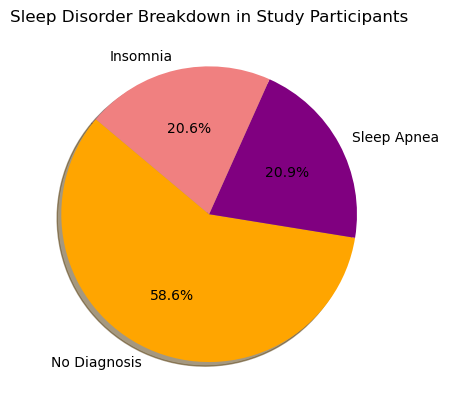

In [59]:
#plot showing sleep disorder breakdown

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sleep Disorder Breakdown in Study Participants")
plt.show()

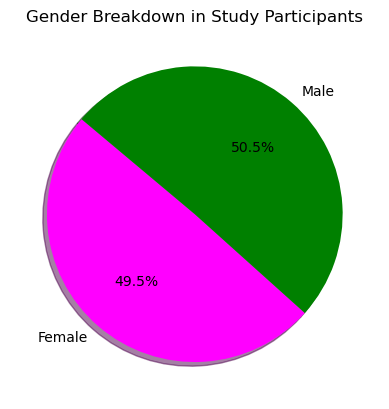

In [60]:
#Determine Gender Breakdown
gender_count=df["Gender"].value_counts()
gender_count

labels='Female', "Male"
sizes=[185, 189]
colors=["magenta", "green"]
explode=(0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Breakdown in Study Participants")
plt.show()

In [61]:
#Determine Age Breakdown Count
age_roundup=df["Age"].value_counts()
age_roundup

#use bins to make it readable to you

df.loc[df["Age"].between(20, 30, 'left'), 'age_bracket'] = '20s'
df.loc[df["Age"].between(30, 40, 'left'), 'age_bracket'] = '30s'
df.loc[df["Age"].between(40, 50, 'left'), 'age_bracket'] = '40s'
df.loc[df["Age"].between(50, 60, 'left'), 'age_bracket'] = '50s'
df.loc[df["Age"].between(60, 70, 'left'), 'age_bracket'] = '60s'
df.loc[df["Age"].between(70, 80, 'left'), 'age_bracket'] = '70s'

df.age_bracket.value_counts()


age_bracket
30s    142
40s    117
50s     96
20s     19
Name: count, dtype: int64

In [62]:
#define variables for bar graph
decade=["20s", "30s", "40s", "50s"]
decade_count=[19, 142, 117, 96]

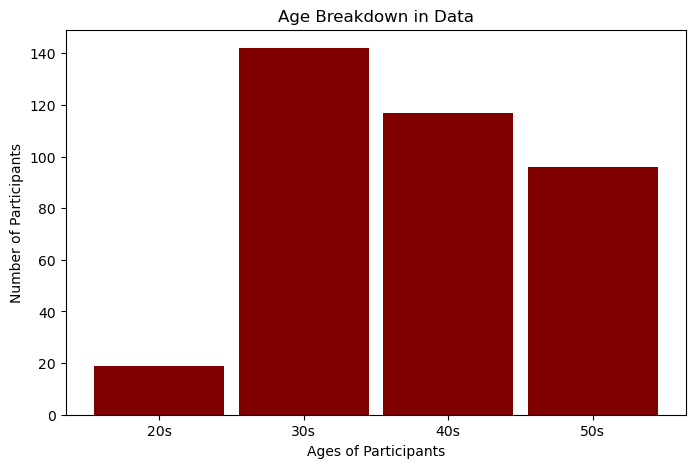

In [66]:
#make age bar graph
fig = plt.figure(figsize = (8, 5))
 
plt.bar(decade, decade_count, color ='maroon', 
        width = .9)
 
plt.xlabel("Ages of Participants")
plt.ylabel("Number of Participants")
plt.title("Age Breakdown in Data")
plt.show()

In [67]:
#Determine Blood Pressure
#create blank list for new values to go
bp_string =[]

rows= df

#thanks Bob for this for line
for index, row in df.iterrows():
    
    #define normal pressure
    if row[13] < 120 and row[14] < 80:
        bp_string.append("normal")

#define elevated blood pressure
    elif row["Systolic"] >= 120 and row["Systolic"]< 130 and row["Diastolic"] < 80:
        bp_string.append("elevated")

#define high blood pressure
    elif row["Systolic"] >= 130  or row["Diastolic"] >= 80:
       bp_string.append("hypertensive")

    else: bp_string.append("low")

df["Blood Pressure String"]=bp_string

df["Blood Pressure String"].value_counts()



Blood Pressure String
hypertensive    332
normal           41
elevated          1
Name: count, dtype: int64

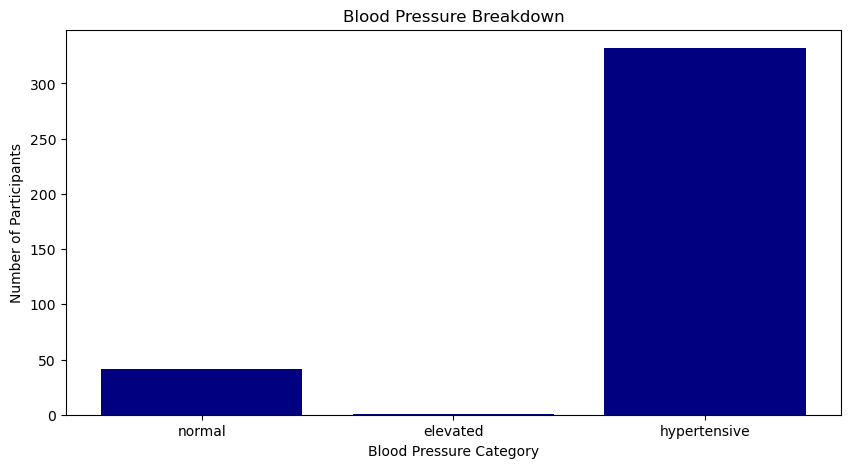

In [72]:
#define variables for bar graph
qualitative_bp=["normal", "elevated", "hypertensive"]
qual_bp_count=[41, 1, 332]

#make blood pressure graph
fig = plt.figure(figsize = (10, 5))
 
plt.bar(qualitative_bp, qual_bp_count, color ='navy', 
        width = 0.8)
 
plt.xlabel("Blood Pressure Category")
plt.ylabel("Number of Participants")
plt.title("Blood Pressure Breakdown")
plt.show()